In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("Students Data.csv")

In [56]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [58]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [59]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [60]:
df.drop("Unnamed: 0",axis=1,inplace=True)

### Gender Distribution


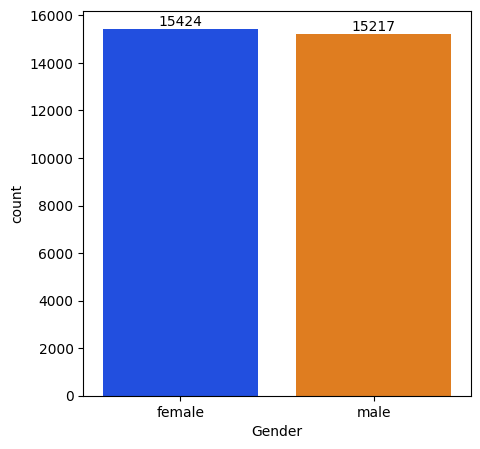

In [61]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Gender',data=df,hue='Gender',palette='bright')
for bars in ax.containers:
    ax.bar_label(bars)

The number of females are more than the males in the data.

### Parents Education

<Axes: ylabel='ParentEduc'>

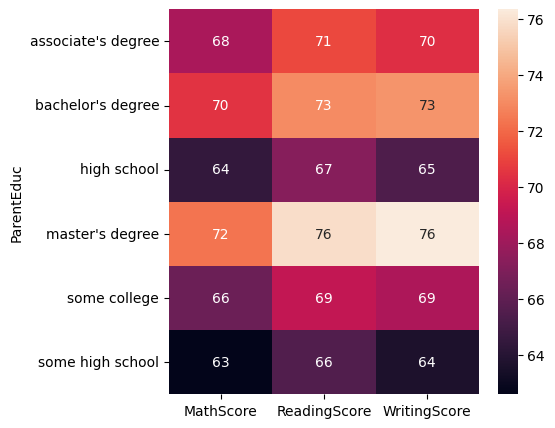

In [62]:
edu=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(edu,annot=True)

Education of parents has a clear impact on their children's academic performance.

### Marital Status of Parents

<Axes: ylabel='ParentMaritalStatus'>

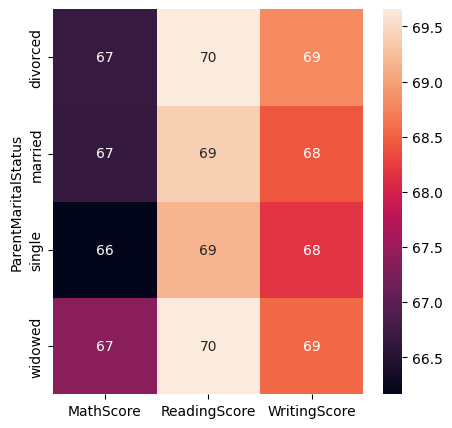

In [63]:
mar=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(mar,annot=True)

Parents Marital status has negligible impact on their children's academic performance.

### Distribution of Ethnic groups


<Axes: ylabel='EthnicGroup'>

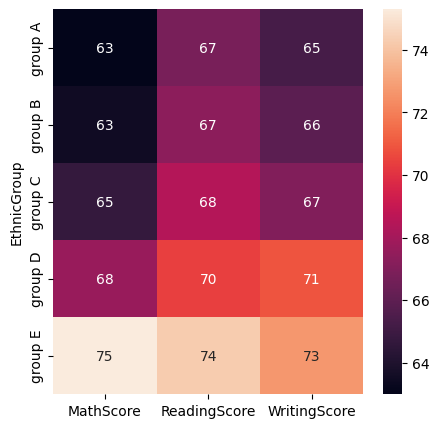

In [64]:
eth=df.groupby("EthnicGroup").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(eth,annot=True)

Ethnic group E has the best performing students.


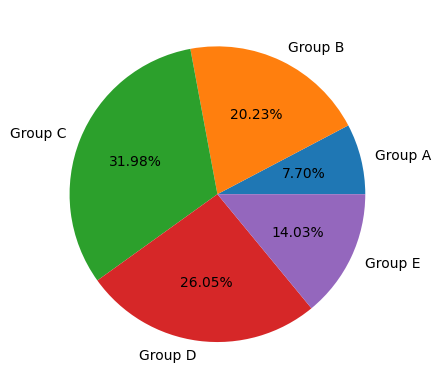

In [65]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

lab = ["Group A","Group B","Group C","Group D","Group E"]
l=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(l,labels = lab,autopct="%1.2f%%")
plt.show()

### Impact Of Study hours

<Axes: ylabel='WklyStudyHours'>

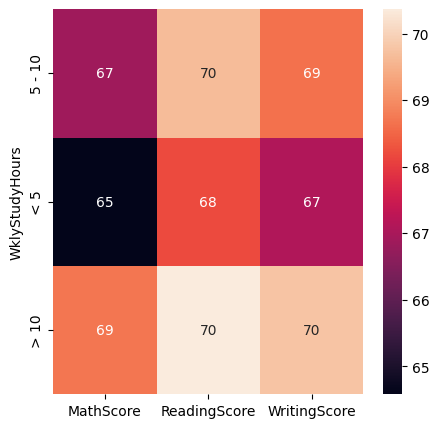

In [66]:
stdh=df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
plt.figure(figsize=(5,5))
sns.heatmap(stdh,annot=True)

Students studying less than 5 hours have performed the worst.

### Impact of Sports

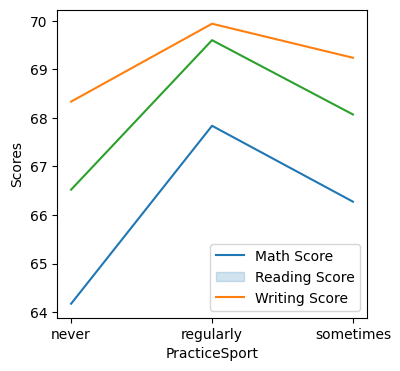

In [67]:
sports=df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
li=["Math Score","Reading Score","Writing Score"]
plt.figure(figsize=(4,4))
sns.lineplot(x='PracticeSport',y=sports['MathScore'],data=sports)
sns.lineplot(x='PracticeSport',y=sports['ReadingScore'],data=sports)
sns.lineplot(x='PracticeSport',y=sports['WritingScore'],data=sports)
palette = {"MathScore": "blue", "ReadingScore": "green", "WritingScore": "orange"}
plt.legend(li)
plt.ylabel("Scores")
plt.show()

Students playing sports regularly have scored more marks in all the subjects on an average.